In [1]:
import matplotlib.pyplot as plt
import numpy as np
import joblib as jl
import pandas as pd
import seaborn as sns
import sklearn.linear_model

In [2]:
data=pd.read_hdf('../data/extended_synthetic_exps.h5')

In [3]:
data_pivae_w = data['pivae']
data_cebra = data['cebra']
pivae=pd.DataFrame.from_dict(data_pivae_w['x-s']['poisson'])
cebra=pd.DataFrame.from_dict(data_cebra['x-s']['infonce'])
del pivae['t']
del cebra['t']
pivae['type']='pivae'
cebra['type'] = 'cebra'
pivae=pivae.melt(id_vars='type', var_name ='distribution', value_name = 'r2' )
cebra=cebra.melt(id_vars='type', var_name ='distribution', value_name = 'r2' )
total = pd.concat([pivae, cebra])
orders = {'poisson':0, 'gaussian':1, 'laplace':2, 'uniform':3}
total=total.sort_values(by='distribution', key =lambda x:x.map(orders)  )


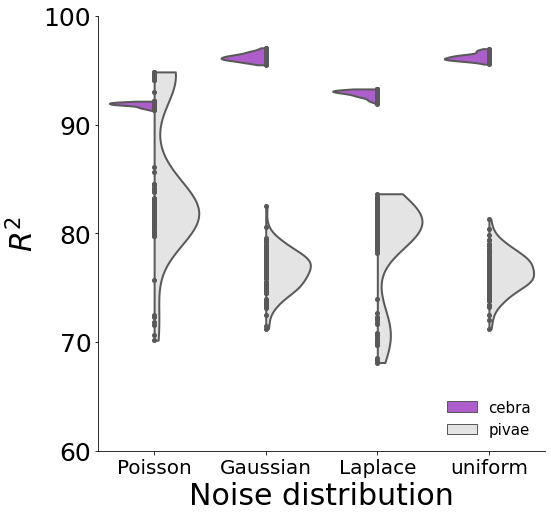

In [4]:
colors = ['#B74CDC','#E4E4E4']
sns.set_palette(sns.color_palette(colors))
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
sns.violinplot(data=total,  x='distribution', y='r2', 
               hue= 'type', split = True, scale = 'width',
               showfliers=False,cut=0, inner = 'point', linewidth = 2, axis=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('$R^2$', fontsize=30)
ax.set_xlabel('Noise distribution', fontsize=30)
ax.set_xticklabels(['Poisson', 'Gaussian', 'Laplace', 'uniform'],fontsize=20 )
ax.set_yticks(np.linspace(0.6, 1, 5))
ax.set_yticklabels(np.linspace(60, 100, 5).astype(int),fontsize=25 )
l1 = ax.legend(fontsize=15, loc="lower right", title_fontsize=15, frameon=False)

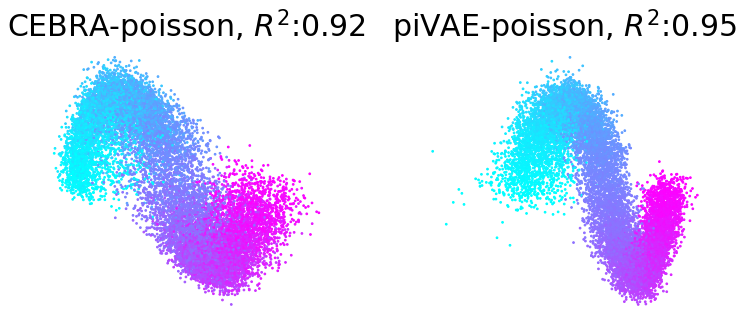

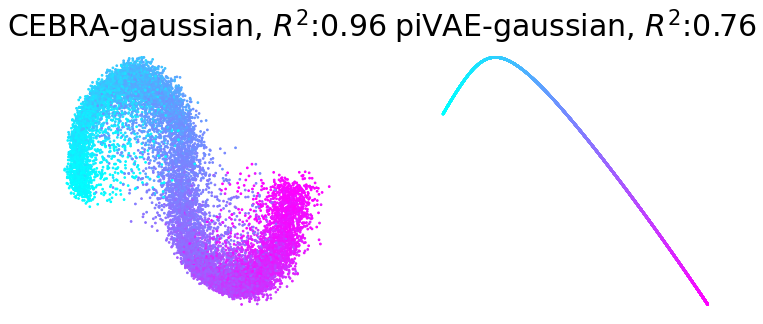

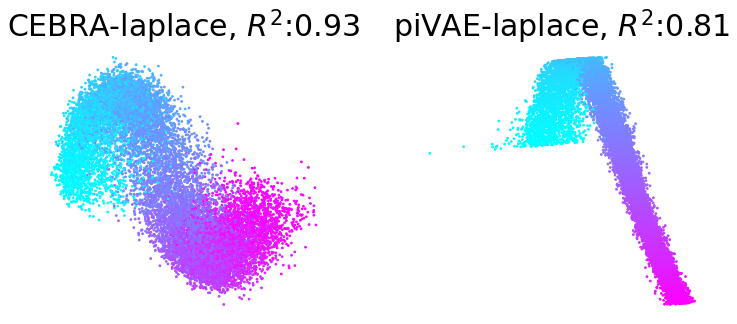

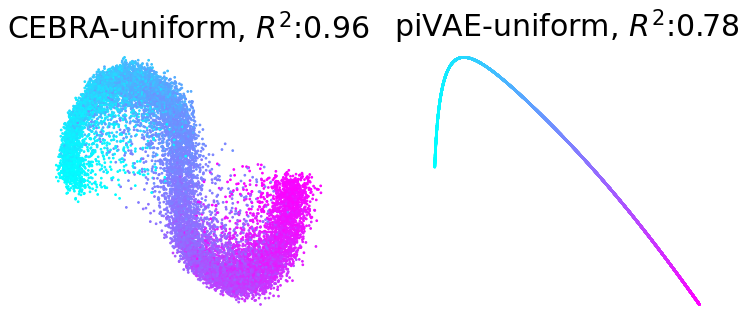

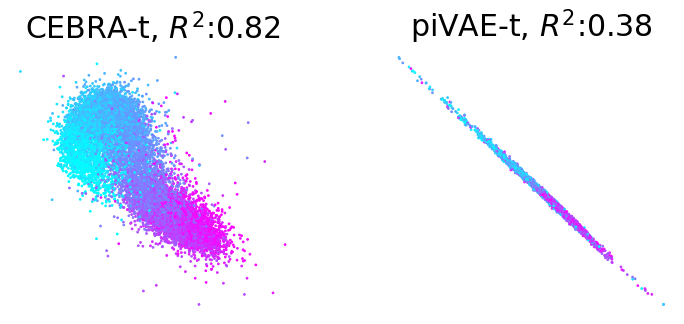

In [5]:
pivae_embs=data['viz']['pivae']
cebra_embs = data['viz']['cebra']
label = data['viz']['label']
z = data['viz']['z']
def fitting(x,y):
    lin_model = sklearn.linear_model.LinearRegression()
    lin_model.fit(x,y)
    return lin_model.score(x,y), lin_model.predict(x)
emission_dict = {'pivae': {}, 'cebra':{}}
    
for i,dist in enumerate(['poisson', 'gaussian', 'laplace', 'uniform','t']) :
    pivae_emission=pivae_embs[dist]
    cebra_emission=cebra_embs[dist]
    cebra_score, fit_cebra = fitting(cebra_emission, z)
    pivae_score, fit_pivae = fitting(pivae_emission, z)
    fig = plt.figure(figsize=(12,5))
    plt.subplots_adjust(wspace = 0.3)
    ax=plt.subplot(121)
    ax.scatter(fit_cebra[:,0], fit_cebra[:,1], c = label, s=3, cmap = 'cool')
    ax.set_title(f'CEBRA-{dist}, $R^2$:{cebra_score:.2f}', fontsize=30)
    ax.axis('off')
    ax=plt.subplot(122)
    ax.scatter(fit_pivae[:,0], fit_pivae[:,1], c = label, s=3,cmap = 'cool')
    ax.set_title(f'piVAE-{dist}, $R^2$:{pivae_score:.2f}', fontsize=30)
    ax.axis('off')
    fig.savefig(f'emission_viz_{dist}.png', transparent=True, bbox_inches = 'tight')

In [6]:
def reindex(dic, list_name= ['poisson', 'gaussian','laplace', 'uniform', 't']):
    return pd.DataFrame(dic).T.reindex(list_name).T*100

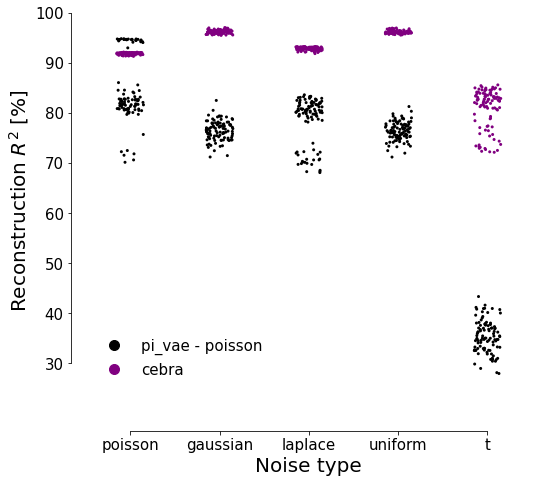

In [7]:
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
fig = plt.figure(figsize=(8,7))

ax=plt.subplot(111)

sns.stripplot(data=reindex(data_pivae_w['x-s']['poisson']), jitter=0.15, s=3, color = 'black', label = 'pi_vae')
sns.stripplot(data=reindex(data_cebra['x-s']['infonce']), jitter = 0.15, s=3, color = 'purple', label = 'cebra')




ax.set_ylabel('Reconstruction $R^2$ [%]', fontsize=20)
ax.set_xlabel('Noise type', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
legend_elements = [Line2D([0], [0],markersize=10, linestyle='none', marker = 'o', color='black', label='pi_vae - poisson'),                    
                   Line2D([0], [0], markersize=10,linestyle='none', marker = 'o', color='purple', label='cebra'),
                   ]
ax.legend(handles=legend_elements, frameon=False, fontsize=15)
sns.despine(left = False, right=True, bottom = False, top = True, trim = True, offset={'bottom':40, 'left':15})